# Written by Federica B. Bianco @fedhere
# for NYU CUSP PUI
# This is my example of Assignment 2, Phase 1 and 2.
# For Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
    # At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be put into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis
- # Wrangle the data so that it is ready for your analysis.

In [160]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as npb
import os

In [148]:
%pylab inline

df = pd.read_csv(os.getenv('PUIDATA') + '/201707-citibike-tripdata.csv')


Populating the interactive namespace from numpy and matplotlib


In [149]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


# IDEA:
## Men and women ride citibike for different average durations. 


# NULL HYPOTHESIS:
## Men and women ride citibike for same average durations.

# ALTERNATIVE HYPOTHESIS:
## Men's ride duration and women's ride duration is different. 

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} <= \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} > \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$

or identically:

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} <= 0 $
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

df.columns

In [150]:
df.drop(['starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'birth year'], axis=1, inplace=True)

In [151]:
df.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [152]:
df.gender.unique()

array([1, 2, 0])

In [153]:
df = df[df.gender != 0]

In [154]:
quant = df.tripduration.quantile(0.95) 

In [155]:
df = df[df.tripduration < quant]

In [156]:
df.head()

,tripduration,gender
0,364,1
2,328,2
5,545,2
6,1496,1
7,1495,2


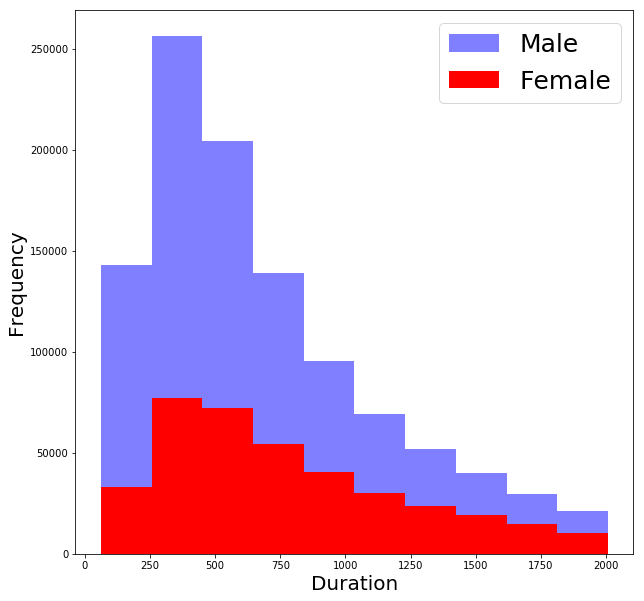

In [157]:
fig = pl.figure(figsize(10,10))

(df[df['gender'] == 1]['tripduration'].plot(kind='hist', color='blue', label='Male', alpha=0.5))

(df[df['gender'] == 2]['tripduration'].plot(kind='hist', color='red', label='Female'))

pl.legend(fontsize=25)
pl.xlabel('Duration', fontsize=20)
pl.ylabel('Frequency', fontsize=20)
pl.show()

## Figure 1a: Distribution of Citibike bikers by gender in July 2017, absolute counts

In [159]:
fig=pl.figure(figsize(15,10))

counts_w = df[df.gender == 2].count()

total_w = df.gender.value_counts()
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind='hist', color='red', label='Female',  yerr=[((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


counts_m = df[df.gender == 1].count()
total_m = df.gender.value_counts()
error_m = np.sqrt(counts_m)
((counts_m) / norm_m).plot(plot(kind='hist', color='blue', label='Male', alpha=0, alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')

ax.set_xlabel('Duration', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
pl.legend(['Female','Male'],fontsize=20)

SyntaxError: invalid syntax (<ipython-input-159-a0f5d1561477>, line 15)

## Figure 1b: Distribution of Citibike bikers by gender in January 2015, absolute counts, with statistical errors

In [ ]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='women bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='SteelBlue', label='men bikers')

ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['women bikers','men bikers'],fontsize=20)


## Figure 2: Distribution of Citibike bikers by gender in January 2015, normalized

we can add up the week and weekend days, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))